In [3]:
library(tidyverse)
library(tibble)

-- Attaching core tidyverse packages ------------------------ tidyverse 2.0.0 --
v dplyr     1.1.4     v readr     2.1.5
v forcats   1.0.0     v stringr   1.5.0
v ggplot2   3.4.2     v tibble    3.2.1
v lubridate 1.9.3     v tidyr     1.3.1
v purrr     1.0.2     
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()
i Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [5]:
load("ml_pay.rdata")

In [7]:
mlb_raw <- tibble(ml_pay)
print(mlb_raw)

# A tibble: 30 x 54
   payroll avgwin Team.name.2014 p1998 p1999 p2000 p2001 p2002 p2003 p2004 p2005
     <dbl>  <dbl> <fct>          <dbl> <dbl> <dbl> <dbl> <dbl> <dbl> <dbl> <dbl>
 1   1.12   0.490 Arizona Diamo~  31.6  70.5  81.0  81.2 103.   80.6  70.2  63.0
 2   1.38   0.553 Atlanta Braves  61.7  74.9  84.5  91.9  93.5 106.   88.5  85.1
 3   1.16   0.454 Baltimore Ori~  71.9  72.2  81.4  72.4  60.5  73.9  51.2  74.6
 4   1.97   0.549 Boston Red Sox  59.5  71.7  77.9 110.  108.   99.9 125.  121. 
 5   1.46   0.474 Chicago Cubs    49.8  42.1  60.5  64.0  75.7  79.9  91.1  87.2
 6   1.32   0.511 Chicago White~  35.2  24.5  31.1  62.4  57.1  51.0  65.2  75.2
 7   1.02   0.486 Cincinnati Re~  20.7  73.3  46.9  45.2  45.1  59.4  43.1  59.7
 8   0.999  0.496 Cleveland Ind~  59.5  54.4  75.9  92.0  78.9  48.6  34.6  41.8
 9   1.03   0.463 Colorado Rock~  47.7  55.4  61.1  71.1  56.9  67.2  64.6  47.8
10   1.43   0.482 Detroit Tigers  19.2  35.0  58.3  49.8  55.0  49.2  46.4  69.0
# i 20 m

In [25]:
mlb_tidy <- mlb_raw %>%
    pivot_longer(colnames(mlb_raw[,4:ncol(mlb_raw)])) %>%
    mutate(year = as.numeric(gsub("\\D", "", name)), var = gsub("[[:digit:]]+", "", name), team=Team.name.2014) %>%
    select(-c("name", "Team.name.2014")) %>%
    pivot_wider(names_from = var, values_from = value) %>%
    rename(payroll_avg = payroll, payroll = p, pct_wins = X.pct, num_wins=X)
print(mlb_tidy)

# A tibble: 510 x 7
   payroll_avg avgwin  year team                 payroll num_wins pct_wins
         <dbl>  <dbl> <dbl> <fct>                  <dbl>    <dbl>    <dbl>
 1        1.12  0.490  1998 Arizona Diamondbacks    31.6       65    0.399
 2        1.12  0.490  1999 Arizona Diamondbacks    70.5      100    0.613
 3        1.12  0.490  2000 Arizona Diamondbacks    81.0       85    0.525
 4        1.12  0.490  2001 Arizona Diamondbacks    81.2       92    0.568
 5        1.12  0.490  2002 Arizona Diamondbacks   103.        98    0.605
 6        1.12  0.490  2003 Arizona Diamondbacks    80.6       84    0.519
 7        1.12  0.490  2004 Arizona Diamondbacks    70.2       51    0.315
 8        1.12  0.490  2005 Arizona Diamondbacks    63.0       77    0.475
 9        1.12  0.490  2006 Arizona Diamondbacks    59.7       76    0.469
10        1.12  0.490  2007 Arizona Diamondbacks    52.1       90    0.552
# i 500 more rows


In [27]:
mlb_total <- mlb_tidy %>%
    group_by(team) %>%
    summarise(payroll_aggregate = mean(payroll), pct_wins_aggregate=mean(pct_wins)) %>%
    select(c("team", "payroll_aggregate", "pct_wins_aggregate"))
print(mlb_total)

# A tibble: 30 x 3
   team                 payroll_aggregate pct_wins_aggregate
   <fct>                            <dbl>              <dbl>
 1 Arizona Diamondbacks              71.9              0.492
 2 Atlanta Braves                    89.3              0.563
 3 Baltimore Orioles                 76.8              0.457
 4 Boston Red Sox                   124.               0.551
 5 Chicago Cubs                      91.3              0.475
 6 Chicago White Sox                 80.9              0.507
 7 Cincinnati Reds                   65.8              0.491
 8 Cleveland Indians                 65.5              0.505
 9 Colorado Rockies                  66.4              0.463
10 Detroit Tigers                    87.3              0.474
# i 20 more rows


In [29]:
mlb_yearly <- mlb_tidy %>%
    select(c("team", "year", "payroll","pct_wins", "num_wins"))
print(mlb_yearly)

# A tibble: 510 x 5
   team                  year payroll pct_wins num_wins
   <fct>                <dbl>   <dbl>    <dbl>    <dbl>
 1 Arizona Diamondbacks  1998    31.6    0.399       65
 2 Arizona Diamondbacks  1999    70.5    0.613      100
 3 Arizona Diamondbacks  2000    81.0    0.525       85
 4 Arizona Diamondbacks  2001    81.2    0.568       92
 5 Arizona Diamondbacks  2002   103.     0.605       98
 6 Arizona Diamondbacks  2003    80.6    0.519       84
 7 Arizona Diamondbacks  2004    70.2    0.315       51
 8 Arizona Diamondbacks  2005    63.0    0.475       77
 9 Arizona Diamondbacks  2006    59.7    0.469       76
10 Arizona Diamondbacks  2007    52.1    0.552       90
# i 500 more rows


In [31]:
mlb_aggregate_computed <- mlb_yearly %>%
    group_by(team) %>%
    summarise(payroll_aggregate_computed = mean(payroll), pct_wins_aggregate_computed=mean(pct_wins))
    print(mlb_aggregate_computed)

# A tibble: 30 x 3
   team                 payroll_aggregate_computed pct_wins_aggregate_computed
   <fct>                                     <dbl>                       <dbl>
 1 Arizona Diamondbacks                       71.9                       0.492
 2 Atlanta Braves                             89.3                       0.563
 3 Baltimore Orioles                          76.8                       0.457
 4 Boston Red Sox                            124.                        0.551
 5 Chicago Cubs                               91.3                       0.475
 6 Chicago White Sox                          80.9                       0.507
 7 Cincinnati Reds                            65.8                       0.491
 8 Cleveland Indians                          65.5                       0.505
 9 Colorado Rockies                           66.4                       0.463
10 Detroit Tigers                             87.3                       0.474
# i 20 more rows


In [33]:
combined <- merge(mlb_total, mlb_aggregate_computed, by.x = "team", by.y = "team")

`geom_smooth()` using formula = 'y ~ x'


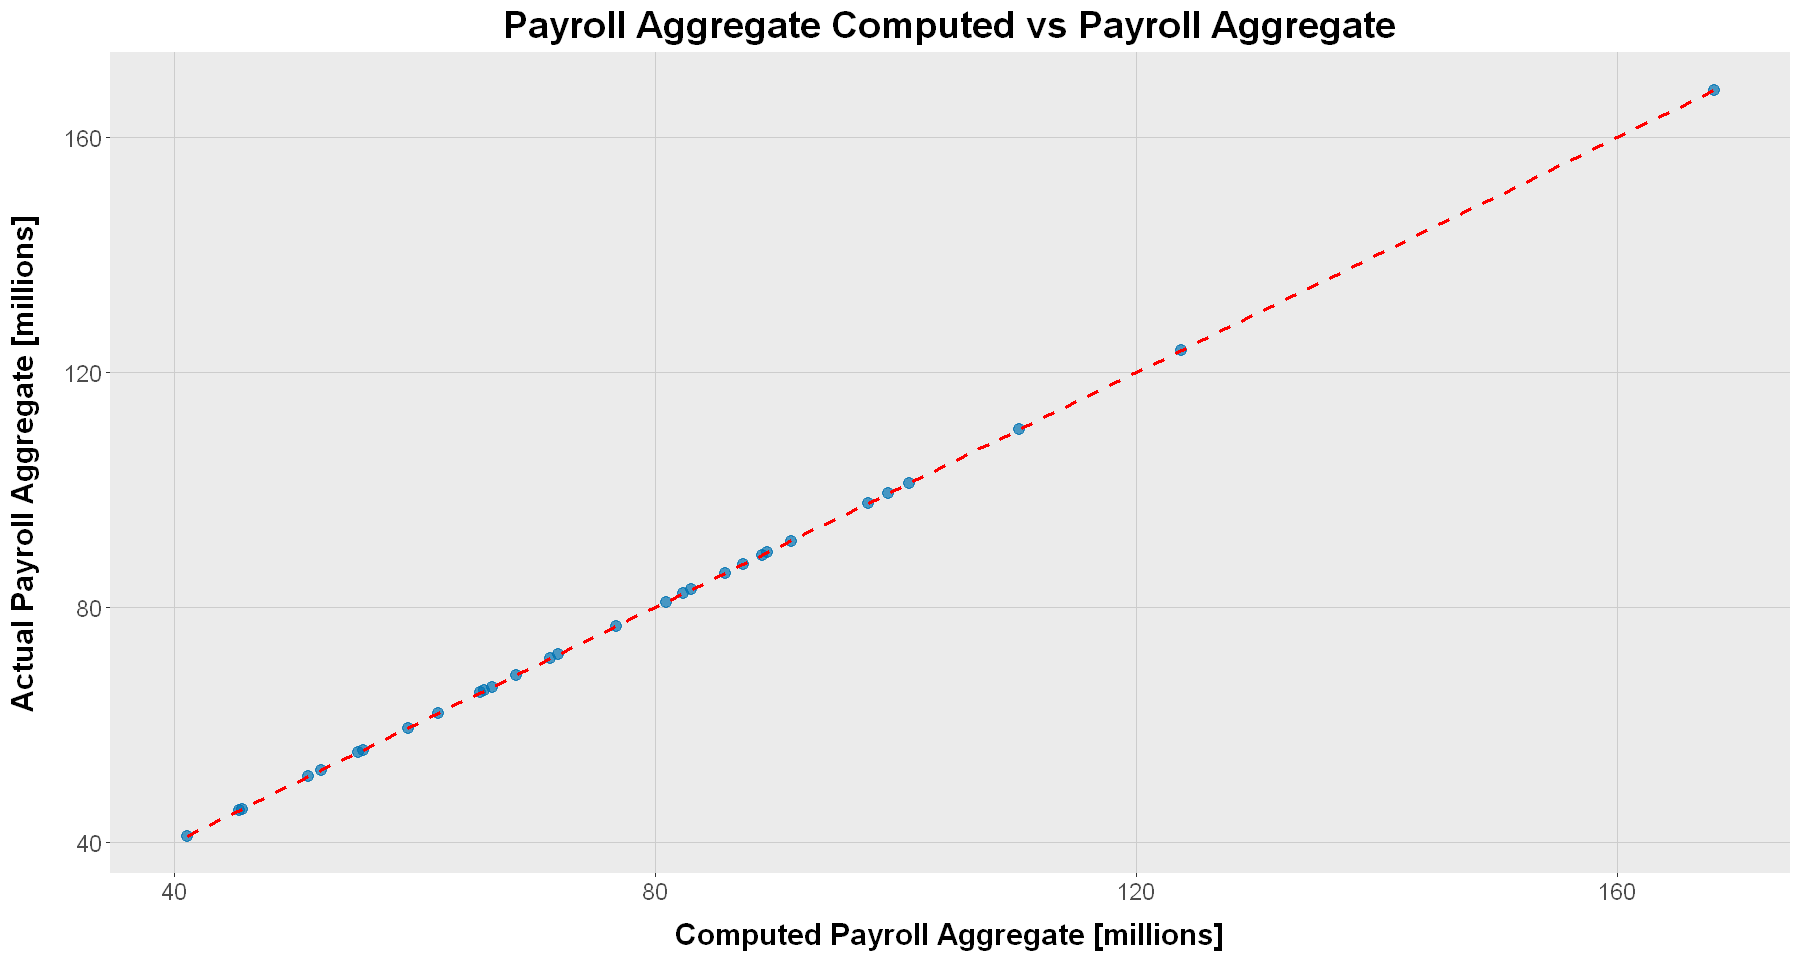

In [365]:
library(ggthemes)
options(repr.plot.width = 15, repr.plot.height = 8)

ggplot(combined, aes(x=payroll_aggregate_computed, y=payroll_aggregate)) +
geom_point(size = 3, color = "#0072B2", alpha = 0.7) + 
geom_smooth(method = "lm", color = "red", linetype = "dashed", se = FALSE, aes(color = "Regression Line")) +
ggtitle("Payroll Aggregate Computed vs Payroll Aggregate") +
xlab("Computed Payroll Aggregate [millions]") +
ylab("Actual Payroll Aggregate [millions]") +
scale_color_manual(name = "Legend", values = c("Regression Line" = "red")) +
theme_grey() +
theme(
    plot.title = element_text(size = 22, face = "bold", hjust = 0.5), 
    axis.title = element_text(size = 18, face = "bold"),
    axis.title.x = element_text(margin = margin(t = 10)),
    axis.title.y = element_text(margin = margin(r = 15)),
    axis.text = element_text(size = 14),
    legend.title = element_text(size = 16, face = "bold"),
    legend.text = element_text(size = 14),
    legend.position = "bottom",
    panel.grid.major = element_line(color = "grey80"), 
    panel.grid.minor = element_blank()
  )

`geom_smooth()` using formula = 'y ~ x'


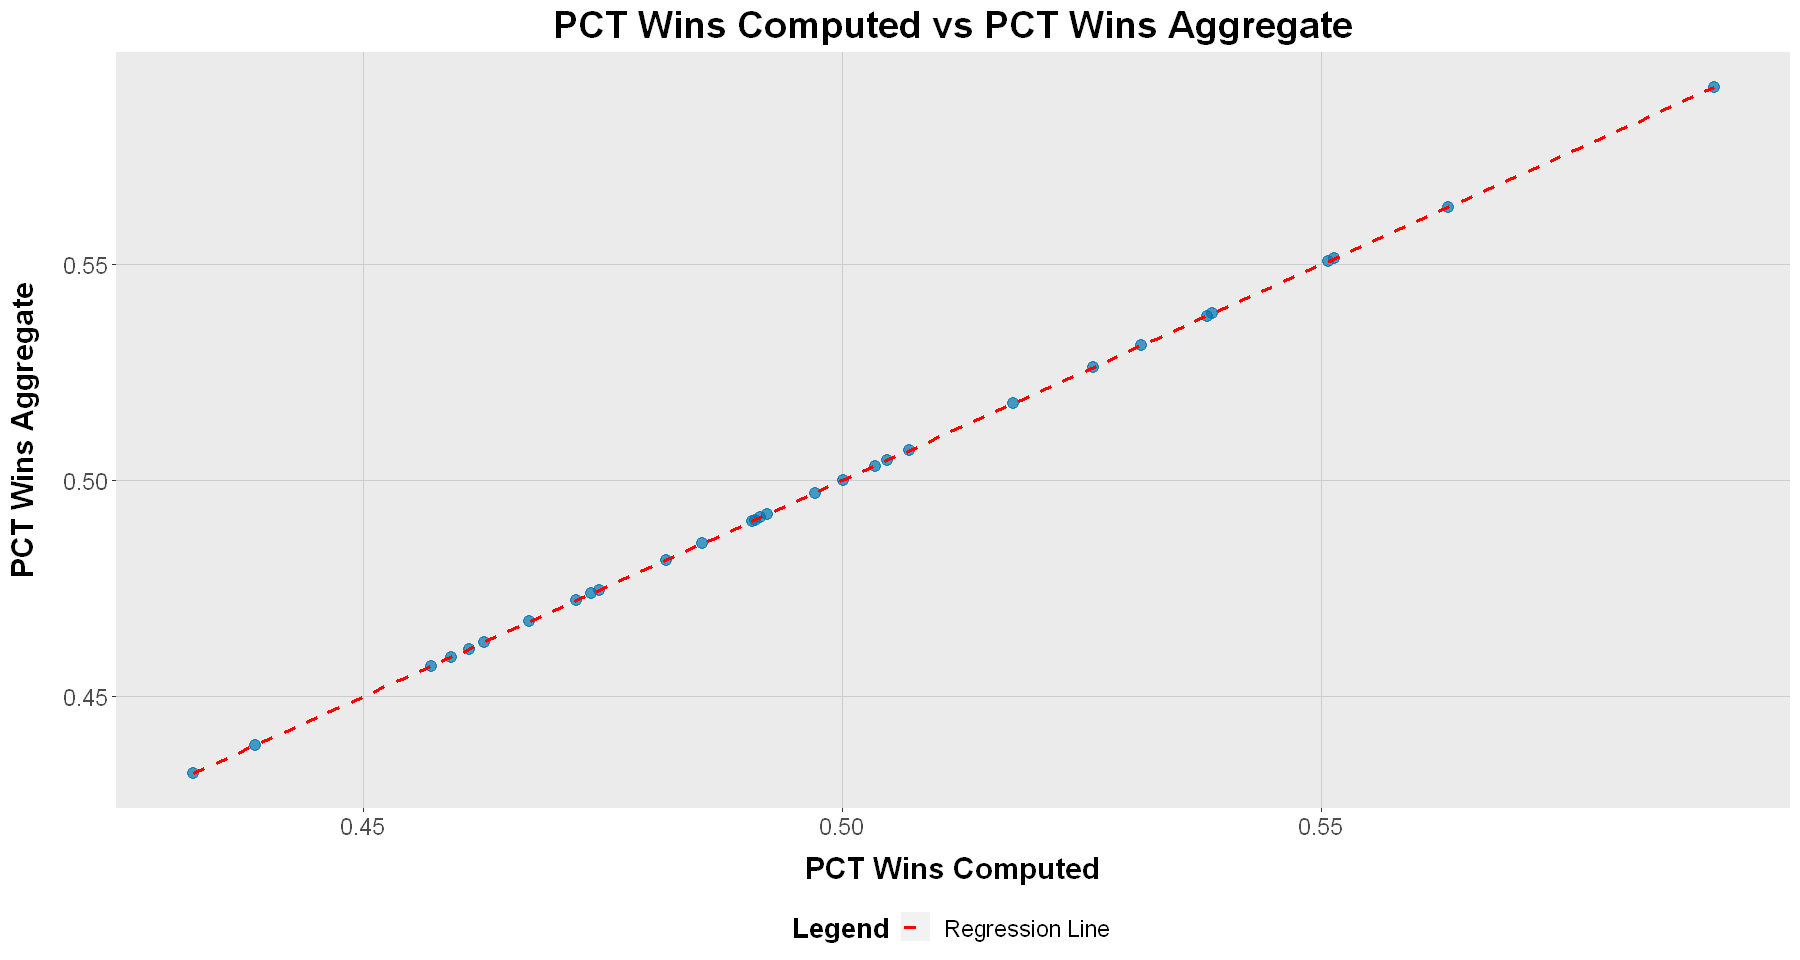

In [164]:
ggplot(combined, aes(x = pct_wins_aggregate_computed, y = pct_wins_aggregate)) +
    geom_point(size = 3, color = "#0072B2", alpha = 0.7) + 
    geom_smooth(method = "lm", linetype = "dashed", se = FALSE, aes(color = "Regression Line")) +
    ggtitle("PCT Wins Computed vs PCT Wins Aggregate") +
    xlab("PCT Wins Computed") +
    ylab("PCT Wins Aggregate") +
    scale_color_manual(name = "Legend", values = c("Regression Line" = "red")) +
    theme_grey() +
    theme(
        plot.title = element_text(size = 22, face = "bold", hjust = 0.5), 
        axis.title = element_text(size = 18, face = "bold"),
        axis.title.x = element_text(margin = margin(t = 10)),
        axis.title.y = element_text(margin = margin(r = 15)),
        axis.text = element_text(size = 14),
        legend.title = element_text(size = 16, face = "bold"),
        legend.text = element_text(size = 14),
        legend.position = "bottom",
        panel.grid.major = element_line(color = "grey80"), 
        panel.grid.minor = element_blank()
    )


Plot payroll as a function of year for each of the 30 teams, faceting the plot by team and adding a red dashed horizontal line for the mean payroll across years of each team.

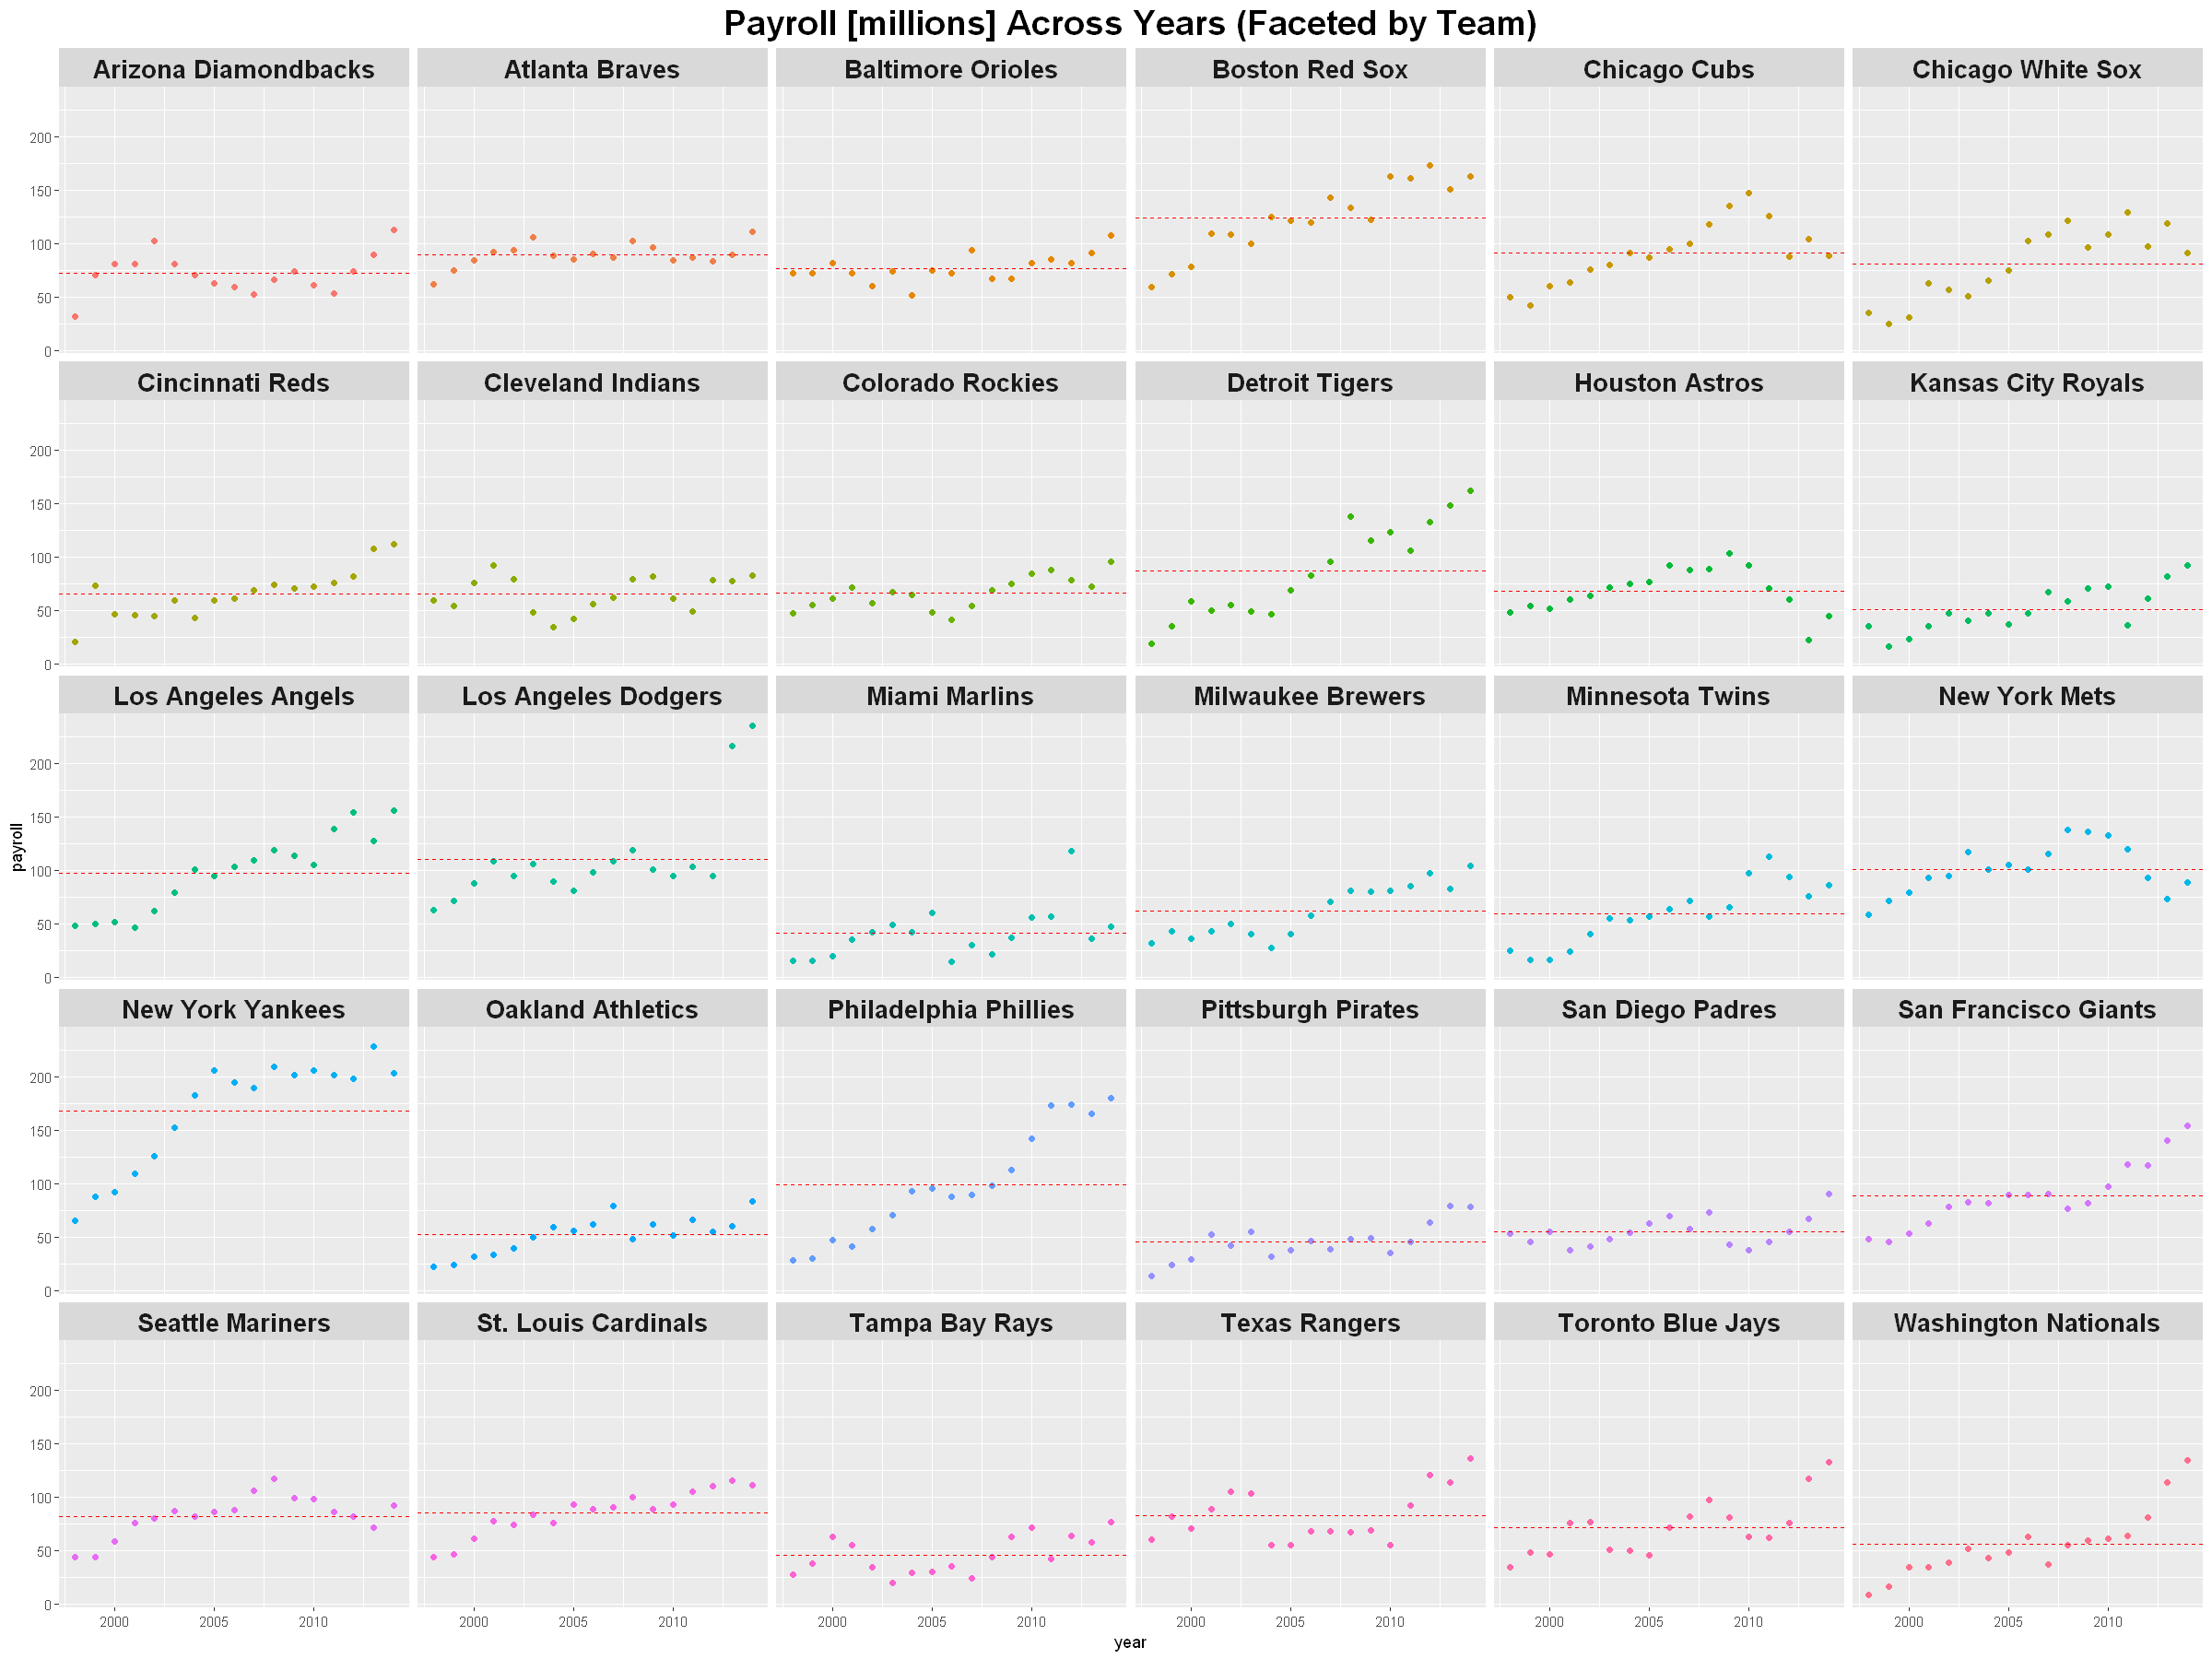

In [367]:
options(repr.plot.width = 20, repr.plot.height = 15)


team_means <- mlb_yearly %>%
  group_by(team) %>%
  summarise(mean_payroll = mean(payroll, na.rm = TRUE))

ggplot(mlb_yearly, aes(x = year, y = payroll, color = team)) +
    geom_point() + 
    geom_hline(data = team_means, aes(yintercept = mean_payroll), color = "red", linetype='dashed') +
    facet_wrap(~team) +
    ggtitle("Payroll [millions] Across Years (Faceted by Team)") +
    theme_grey() + 
    theme(legend.position="none", 
         plot.title = element_text(size = 22, face = "bold", hjust = 0.5),
         strip.text = element_text(size = 16, face = "bold"))


Using dplyr, identify the three teams with the greatest payroll_aggregate_computed, and print a table of these teams and their payroll_aggregate_computed.

In [171]:
mlb_aggregate_computed %>%
    arrange(desc(payroll_aggregate_computed)) %>%
    select(team,payroll_aggregate_computed) %>%
    head(3)

team,payroll_aggregate_computed
<fct>,<dbl>
New York Yankees,168.0643
Boston Red Sox,123.7400
Los Angeles Dodgers,110.2467


Using dplyr, identify the three teams with the greatest percentage increase in payroll from 1998 to 2014 (call it pct_increase), and print a table of these teams along with pct_increase as well as their payroll figures from 1998 and 2014.

In [138]:
mlb_yearly %>%
    filter(year %in% c(1998, 2014)) %>%
    select(team, year, payroll) %>%
    pivot_wider(names_from = year, values_from = payroll, names_prefix = "payroll_") %>%
    mutate(pct_increase = ((payroll_2014 - payroll_1998) / payroll_1998)*100) %>%
    arrange(desc(pct_increase)) %>%
    head(3)

team,payroll_1998,payroll_2014,pct_increase
<fct>,<dbl>,<dbl>,<dbl>
Washington Nationals,8.3170,134.7044,1519.6277
Detroit Tigers,19.2375,162.2285,743.2932
Philadelphia Phillies,28.6225,180.0527,529.0601


How are the metrics payroll_aggregate_computed and pct_increase reflected in the plot above, and how can we see that the two sets of teams identified above are the top three in terms of these metrics?

Plot pct_wins as a function of year for each of the 30 teams, faceting the plot by team and adding a red dashed horizontal line for the average pct_wins across years of each team.

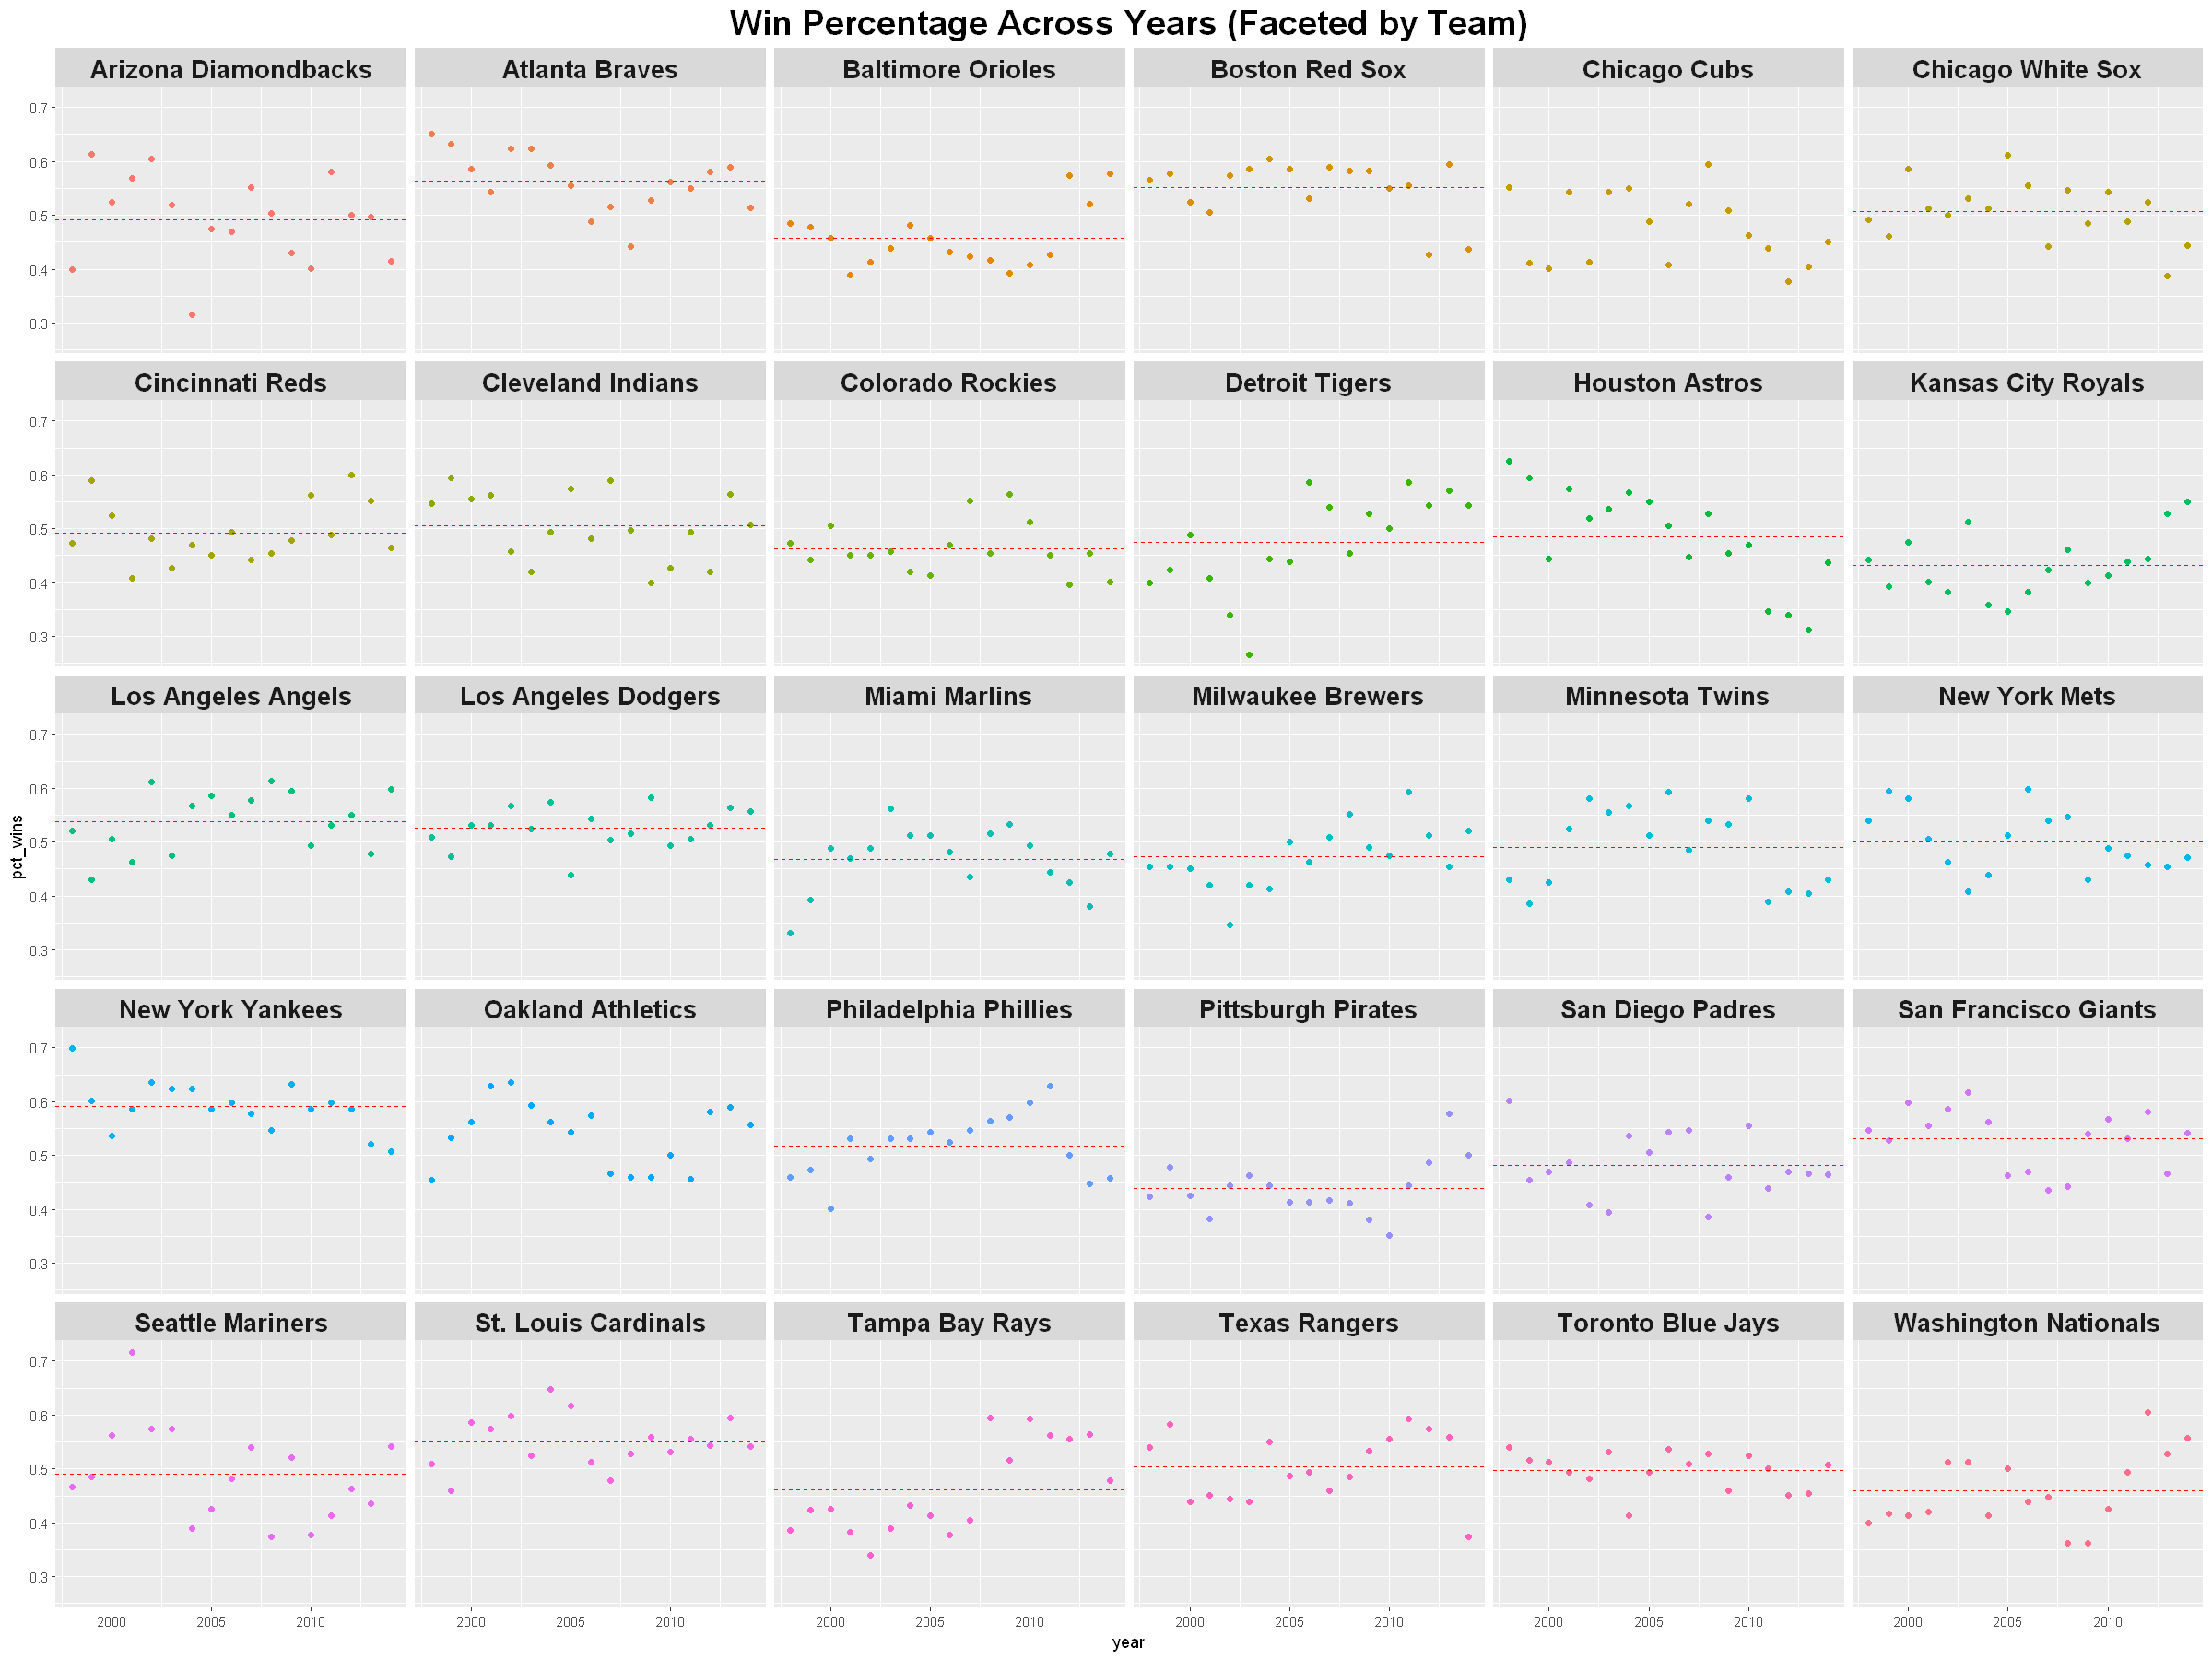

In [169]:
options(repr.plot.width = 20, repr.plot.height = 15)


team_means <- mlb_yearly %>%
  group_by(team) %>%
  summarise(mean_pct_win = mean(pct_wins, na.rm = TRUE))

ggplot(mlb_yearly, aes(x = year, y = pct_wins, color = team)) +
    geom_point() + 
    geom_hline(data = team_means, aes(yintercept = mean_pct_win), color = "red", linetype='dashed') +
    facet_wrap(~team) +
    ggtitle("Win Percentage Across Years (Faceted by Team)") +
    theme_grey() + 
    theme(legend.position="none", 
         plot.title = element_text(size = 22, face = "bold", hjust = 0.5),
         strip.text = element_text(size = 16, face = "bold"))


Using dplyr, identify the three teams with the greatest pct_wins_aggregate_computed and print a table of these teams along with pct_wins_aggregate_computed.

In [175]:
mlb_aggregate_computed %>%
    arrange(desc(pct_wins_aggregate_computed)) %>%
    select(team,pct_wins_aggregate_computed) %>%
    head(3)

team,pct_wins_aggregate_computed
<fct>,<dbl>
New York Yankees,0.5909819
Atlanta Braves,0.5631539
Boston Red Sox,0.5512860


Using dplyr, identify the three teams with the most erratic pct_wins across years (as measured by the standard deviation, call it pct_wins_sd) and print a table of these teams along with pct_wins_sd.

In [178]:
mlb_yearly %>%
    filter(year %in% c(1998, 2014)) %>%
    select(team, year, pct_wins) %>%
    pivot_wider(names_from = year, values_from = pct_wins, names_prefix = "pct_wins_") %>%
    mutate(pct_increase = ((pct_wins_2014 - pct_wins_1998) / pct_wins_1998)*100) %>%
    arrange(desc(pct_increase)) %>%
    head(3)

team,pct_wins_1998,pct_wins_2014,pct_increase
<fct>,<dbl>,<dbl>,<dbl>
Miami Marlins,0.3312883,0.4788732,44.54877
Washington Nationals,0.3987730,0.5563380,39.51246
Detroit Tigers,0.3987730,0.5422535,35.98050


Using dplyr, identify the three teams with the most erratic pct_wins across years (as measured by the standard deviation, call it pct_wins_sd) and print a table of these teams along with pct_wins_sd.

How are the metrics pct_wins_aggregate_computed and pct_wins_sd reflected in the plot above, and how can we see that the two sets of teams identified above are the top three in terms of these metrics?

Create a scatter plot of pct_wins versus payroll based on the aggregated data, labeling each point with the team
name using geom_text_repel from the ggrepel package and adding the least squares line.

• Is the relationship between payroll and pct_wins positive or negative? Is this what you would expect, and why?

In [250]:
library(ggrepel)

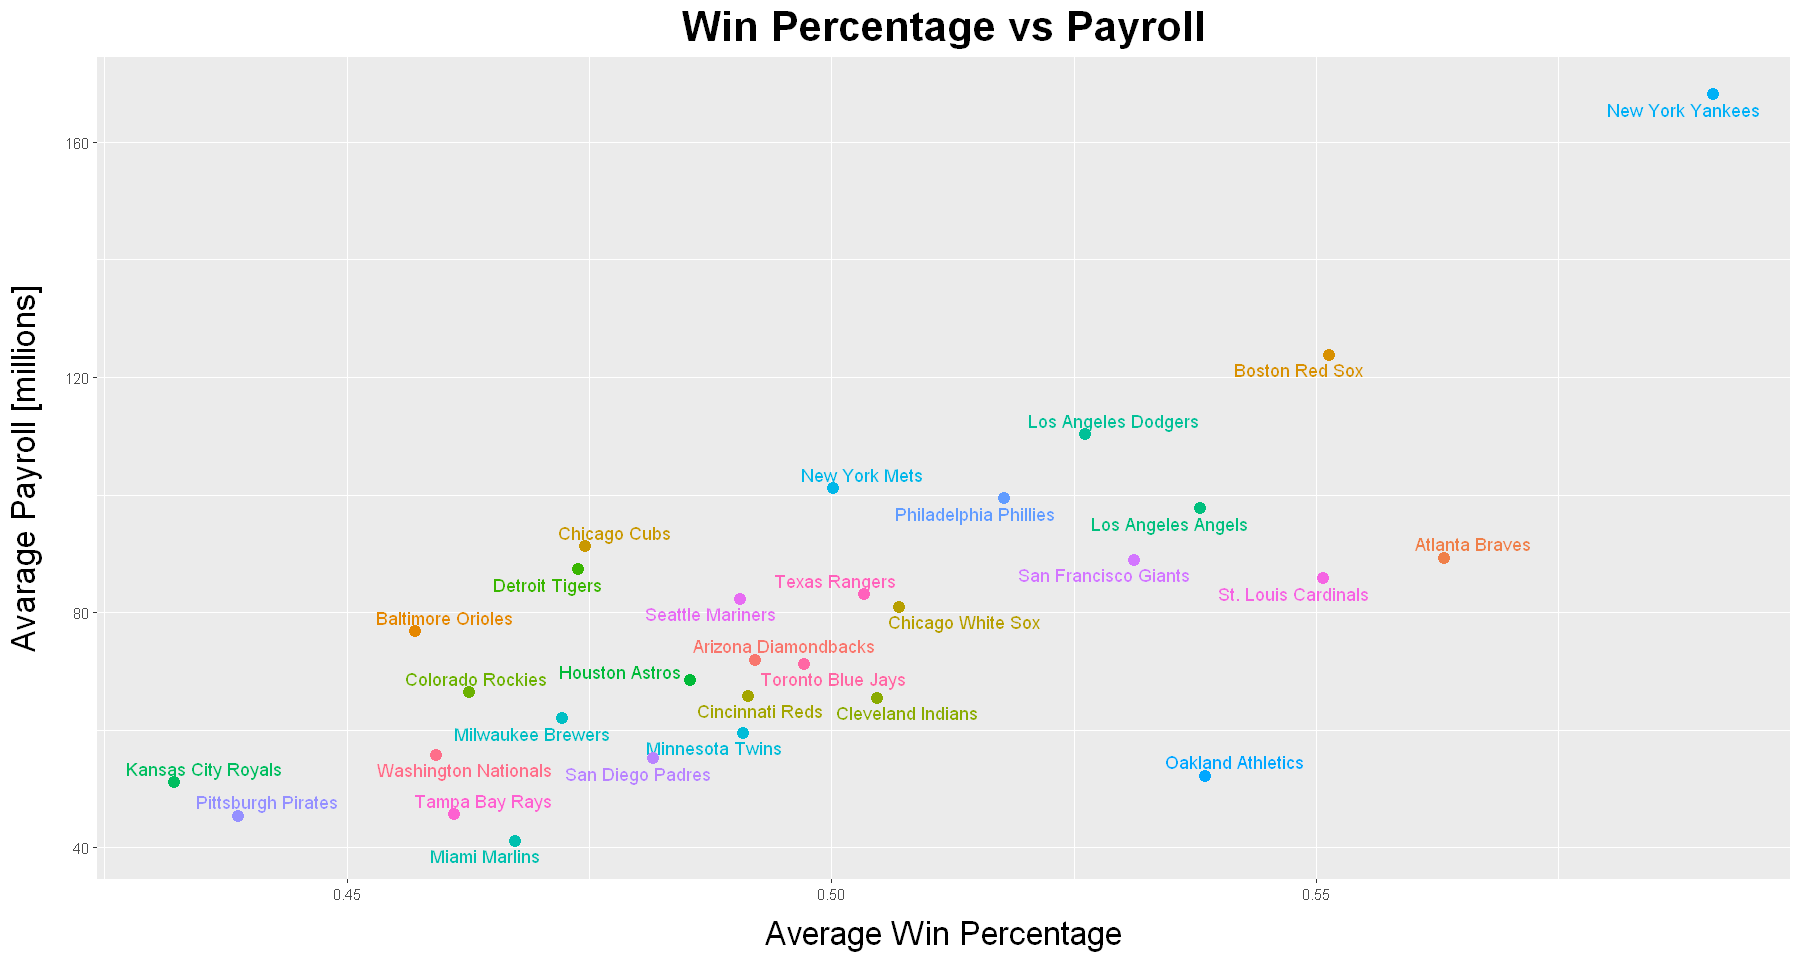

In [371]:
options(repr.plot.width = 15, repr.plot.height = 8)

mlb_aggregate_computed %>%
ggplot(aes(x=pct_wins_aggregate_computed, payroll_aggregate_computed, color=team, label  = team)) +
geom_text_repel() +
geom_point(size=3) + 
ggtitle("Win Percentage vs Payroll") + 
xlab("Average Win Percentage") + 
ylab("Avarage Payroll [millions]") + 
theme_gray() + 
theme(
    legend.position = "none",
    plot.title = element_text(size = 25, hjust = 0.5, face="bold"),
    axis.title = element_text(size=20),
    axis.title.x = element_text(margin = margin(t = 10)),
    axis.title.y = element_text(margin = margin(r = 15)),
)

Define a team’s efficiency as the ratio of the aggregate win percentage to the aggregate payroll—more efficient teams are
those that win more with less money.

• Using dplyr, identify the three teams with the greatest efficiency, and print a table of these teams
along with their efficiency, as well as their pct_wins_aggregate_computed and
payroll_aggregate_computed.

In [361]:
top_eff <- mlb_aggregate_computed %>%
    mutate(eff = pct_wins_aggregate_computed/payroll_aggregate_computed) %>%
    arrange(desc(eff))
head(top_eff,3)

team,payroll_aggregate_computed,pct_wins_aggregate_computed,eff
<fct>,<dbl>,<dbl>,<dbl>
Miami Marlins,41.06429,0.4673161,0.01138011
Oakland Athletics,52.21017,0.5385489,0.01031502
Tampa Bay Rays,45.65805,0.4610341,0.01009754


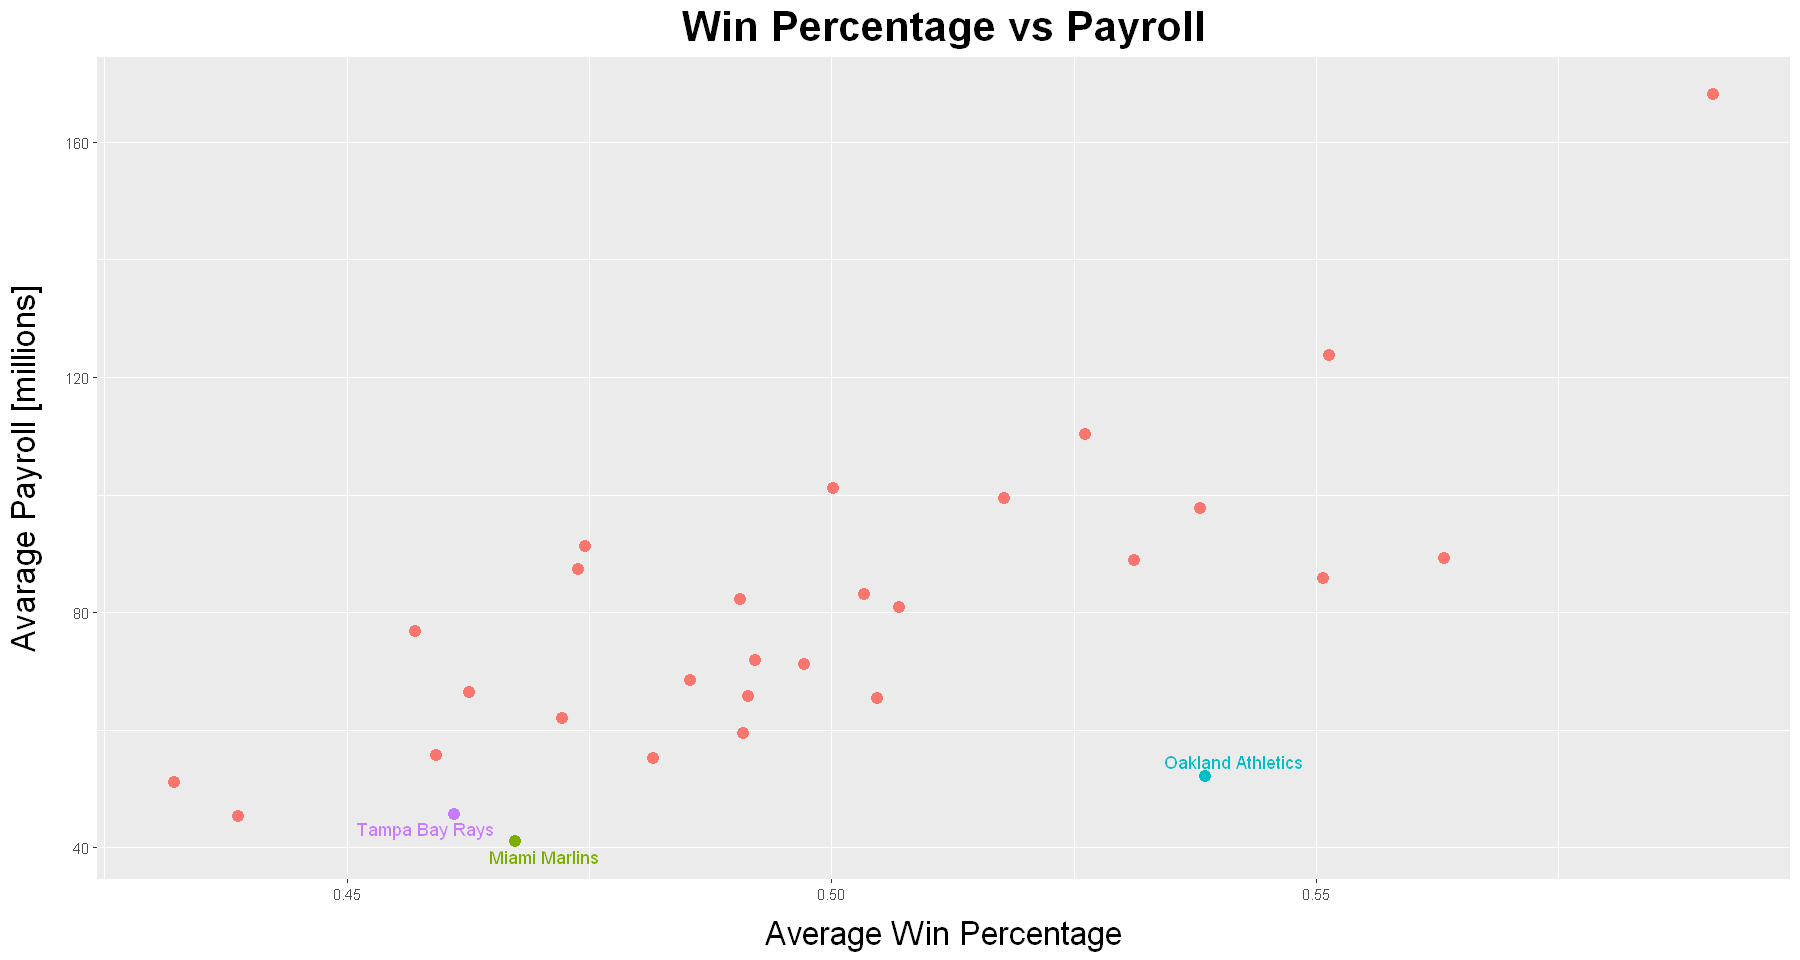

In [377]:
mlb_comp_temp <- top_eff %>%
  mutate(team = as.character(team))

mlb_comp_temp[-c(1:3),]$team = ""

mlb_comp_temp %>%
ggplot(aes(x=pct_wins_aggregate_computed, payroll_aggregate_computed, color=team, label  = team)) +
geom_text_repel() +
geom_point(size=3) + 
ggtitle("Win Percentage vs Payroll") + 
xlab("Average Win Percentage") + 
ylab("Avarage Payroll [millions]") + 
theme_gray() + 
theme(
    legend.position = "none",
    plot.title = element_text(size = 25, hjust = 0.5, face="bold"),
    axis.title = element_text(size=20),
    axis.title.x = element_text(margin = margin(t = 10)),
    axis.title.y = element_text(margin = margin(r = 15)),
)

In [329]:
mlb_comp_temp <- mlb_aggregate_computed %>%
  mutate(team = as.character(team))

mlb_comp_temp[rownames(filter(mlb_aggregate_computed, !team %in% c(top_3_eff$team))),]$team = ""

In [341]:
rownames(filter(mlb_aggregate_computed, team %in% top_3$team))

team,payroll_aggregate_computed,pct_wins_aggregate_computed
<fct>,<dbl>,<dbl>
Boston Red Sox,123.7400,0.5512860
Los Angeles Dodgers,110.2467,0.5261364
New York Yankees,168.0643,0.5909819
